In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
path= ('/content/drive/MyDrive/Colab Notebooks/CSE5317-DataMining-HW/new_df_GSE25724.csv')
data = pd.read_csv(path)
data.head()

,Gene Symbol,GSM631755,GSM631756,GSM631757,GSM631758,GSM631759,GSM631760,GSM631761,GSM631762,GSM631763,GSM631764,GSM631765,GSM631766,GSM631767
0,DDR1 /// MIR4640,9.37362,9.27457,9.31466,8.81297,9.22501,8.61950,9.79252,8.71202,8.88780,9.41581,8.86084,10.18350,8.75550
1,RFC2,4.88624,4.57343,4.66537,4.41698,4.53738,4.89242,4.57879,4.36370,4.33044,4.33198,4.17537,4.39334,4.65933
2,HSPA6,4.96282,4.91762,4.99780,5.68013,7.17241,5.41695,5.21297,5.26965,5.54095,6.35407,5.62223,5.32080,5.87183
3,PAX8,7.80585,7.25204,7.10025,7.98722,7.83563,8.09589,7.66055,7.46696,8.01953,8.54850,8.89975,8.24420,8.10341
4,GUCA1A,2.99568,3.13716,3.31115,3.39302,3.22608,3.44840,3.53151,3.37321,3.58914,3.60277,3.83550,3.60085,3.84845


In [ ]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
missing_values[missing_values > 0]

Gene Symbol    1058
dtype: int64

#Hierarchical Clustering

In [ ]:
from scipy.stats import ttest_ind
import numpy as np
gene_data_transposed = data_selected_samples.drop('Cluster', axis=1).transpose()
diabetic_data = data_selected_samples.drop('Cluster', axis=1).transpose()[diabetic_samples]
non_diabetic_data = data_selected_samples.drop('Cluster', axis=1).transpose()[non_diabetic_samples]
p_value_threshold = 0.05
p_values = ttest_ind(diabetic_data, non_diabetic_data, axis=1).pvalue
dge_genes = gene_data_transposed.index[p_values < p_value_threshold]
num_dge_genes = len(dge_genes)
num_dge_genes, dge_genes[:10]  # Display the number of DGEs and the first 10 DGEs as a sample

(10207, Index([1, 3, 4, 5, 6, 7, 8, 10, 12, 14], dtype='object'))

In [ ]:

dge_df = pd.DataFrame({
    'Gene': gene_data_transposed.index,
    'P_Value': p_values
})
dge_df = dge_df[dge_df['Gene'].isin(dge_genes)]
top_50_dge_df = dge_df.sort_values(by='P_Value').head(50)
top_50_dge_genes = top_50_dge_df['Gene'].values
top_50_dge_df.head()

,Gene,P_Value
19659,19659,1.254772e-07
10873,10873,1.510994e-06
18055,18055,1.758990e-06
672,672,1.899070e-06
16407,16407,4.481248e-06


In [ ]:

gene_id_to_symbol_mapping = data.set_index('Gene Symbol').iloc[top_50_dge_df.index].index
top_50_dge_symbols_df = pd.DataFrame({
    'Gene Symbol': gene_id_to_symbol_mapping,
    'P-Value': top_50_dge_df.set_index('Gene').loc[top_50_dge_genes, 'P_Value'].values
})

top_50_dge_symbols_df.head()

,Gene Symbol,P-Value
0,NaN,1.254772e-07
1,FUT6,1.510994e-06
2,SYBU,1.758990e-06
3,HAX1,1.899070e-06
4,HMGB1P12 /// HMGB1P12,4.481248e-06


In [ ]:

top_50_gene_symbols = top_50_dge_symbols_df['Gene Symbol'].dropna().unique()
top_50_genes_data = data[data['Gene Symbol'].isin(top_50_gene_symbols)]
top_50_genes_data.head()

,Gene Symbol,GSM631755,GSM631756,GSM631757,GSM631758,GSM631759,GSM631760,GSM631761,GSM631762,GSM631763,GSM631764,GSM631765,GSM631766,GSM631767
12,CYP2A6,5.14176,5.33106,5.10336,5.71773,5.40839,5.67640,5.42611,5.50447,5.93320,6.21225,6.40010,5.46166,6.17462
122,EIF3A,8.54629,8.96696,8.89762,8.45815,9.11465,9.05496,8.66127,8.83920,8.21940,7.41933,7.46135,8.44425,7.46585
123,EIF3A,8.19398,8.60383,7.61811,6.36168,8.69479,7.81138,8.24347,8.18260,8.33399,6.22697,6.01817,8.36403,7.70942
124,EIF3A,6.71516,6.53905,6.73702,6.69567,6.54134,6.63566,7.27119,5.87483,5.28164,5.74186,5.81813,5.63399,5.37321
416,SSR1,7.34110,7.04425,6.47693,6.22729,6.57958,6.28207,6.19399,5.95010,6.17414,5.97468,5.47972,6.31191,5.74867


In [ ]:

top_50_genes_data_avg = top_50_genes_data.groupby('Gene Symbol').mean()
top_50_genes_data_transposed = top_50_genes_data_avg.transpose()
top_50_genes_data_transposed.head()

Gene Symbol,AASDHPPT,ANKHD1 /// ANKHD1-EIF4EBP3,APBA2,APEX1,ATXN2L,BLOC1S5-TXNDC5 /// TXNDC5,C7orf43,CDC40,CYP2A6,EDEM3,...,SRP72,SSR1,STK24,STOML2,SYBU,SYN3,TCEA1,TGM2,TMC6,TOP3A
GSM631755,6.722230,7.102687,5.395585,10.41060,4.453210,9.60217,5.87553,5.499050,5.090338,3.891185,...,6.599860,8.146040,7.613897,8.14197,7.90020,4.40166,9.44960,6.750580,5.653220,4.700587
GSM631756,6.902470,7.511737,5.858625,9.52260,4.726345,9.36262,5.80268,5.675725,5.221077,3.982555,...,6.430235,7.639520,7.188377,7.44704,8.43601,4.51393,9.09768,6.401312,5.673570,4.754877
GSM631757,7.256645,7.319430,5.155400,9.40336,4.528030,9.27774,6.03741,5.671630,5.204370,4.113805,...,6.671800,7.801177,7.387103,7.65658,8.47439,4.38656,9.78386,5.933232,5.582280,4.814907
GSM631758,5.798805,6.826170,6.043145,9.20730,4.934400,9.31502,6.24768,4.934035,5.723490,3.439030,...,5.657857,7.550930,6.884493,6.90108,7.61503,4.82206,8.30887,6.075795,5.920645,5.041643
GSM631759,6.762280,7.285333,5.494595,9.78327,4.498165,10.04840,5.97929,5.582225,5.379817,4.001495,...,6.592010,7.837070,7.374307,7.41113,8.04980,4.54187,9.57922,6.368453,5.982925,4.779080


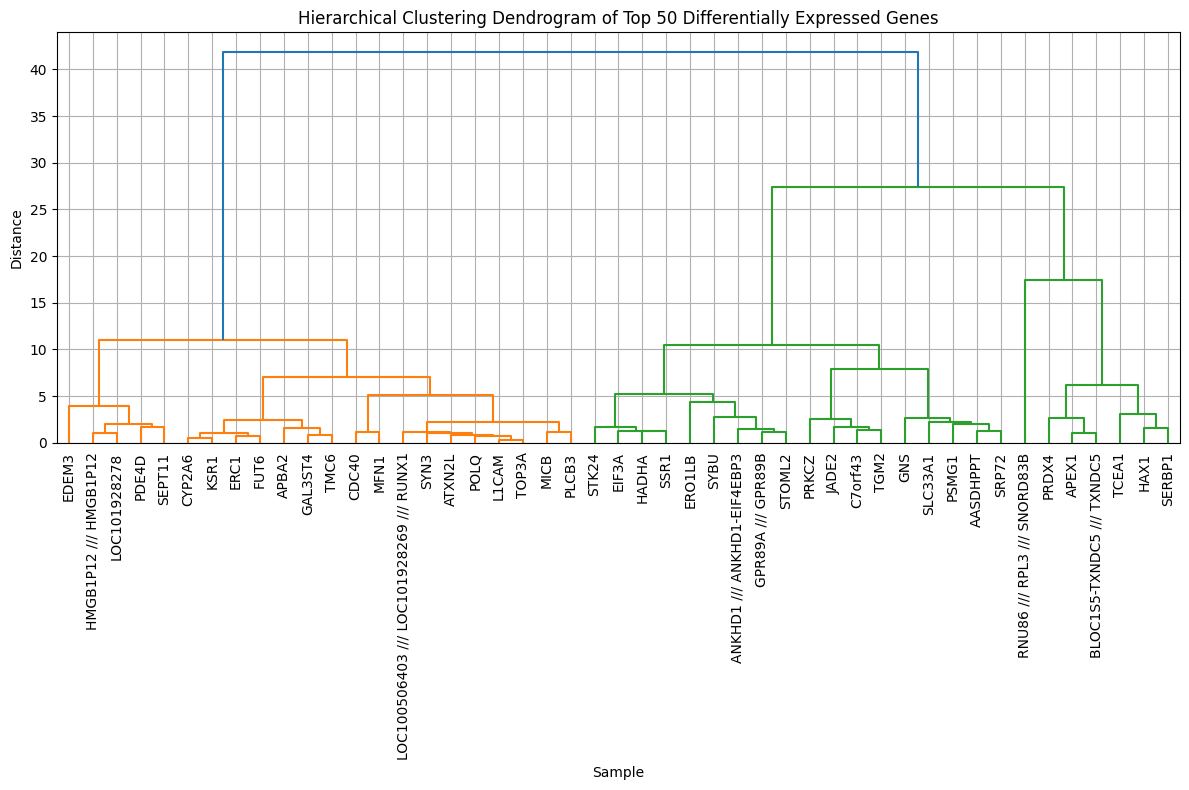

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(top_50_genes_data_avg, method='ward', metric='euclidean')
plt.figure(figsize=(12, 8))
dendrogram(Z, labels=top_50_genes_data_avg.index, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram of Top 50 Differentially Expressed Genes')
plt.xlabel('Sample')
plt.ylabel('Distance')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

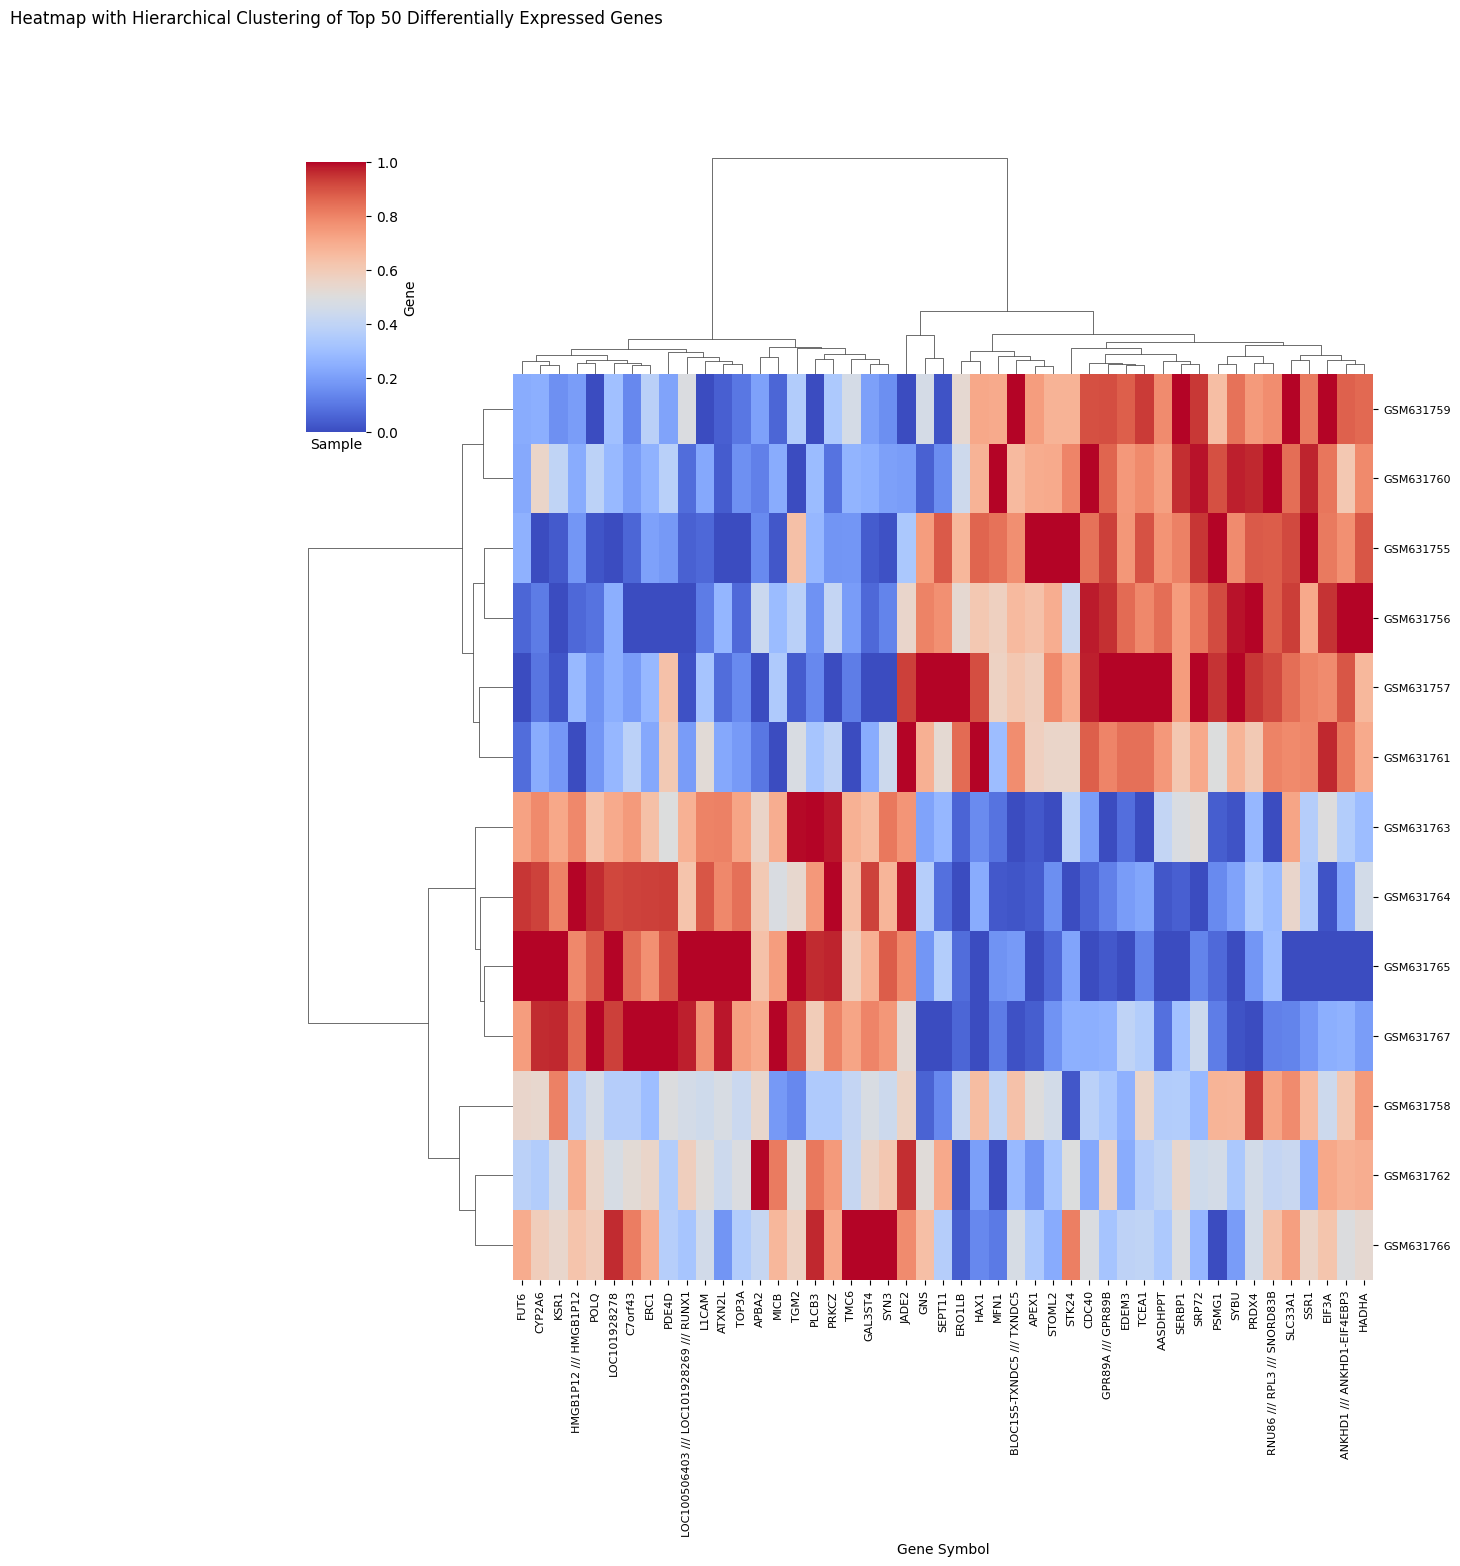

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 8))
g = sns.clustermap(top_50_genes_data_transposed, method='ward', cmap='coolwarm', standard_scale=1,
                   figsize=(12, 15), xticklabels=True, yticklabels=True)
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize=8)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize=8)
plt.title('Heatmap with Hierarchical Clustering of Top 50 Differentially Expressed Genes', pad=100)
plt.xlabel('Sample')
plt.ylabel('Gene')
plt.show()